# Perceptron  Algorithm
Author: [Olabanji Olaniyan](www.linkedin.com/in/olabanji-olaniyan-data-analyst)

A perceptron is one of the simplest artificial neural network architectures. It is based on a slightly different artificial neuron called a Threshold logic Unit (TLU) or a Linear threshold unit. It is a single neuron (a perceptron).


The activation function used by the perceptron is the step function. This is mathematically expressed as 
$$g(z) = \begin{cases} 
0 & \text{if } z < 0 \\
1 & \text{if } z \geq 0 
\end{cases}$$

The perception is a single neuron, and it's made up of the input layer and just the one output layer. The intuition behind a perceptron is that each input in the input layer x_i is assigned a weight w_i. Then, a weighted sum + bias is computed and fed through its activation function (which is the step function $g(z)$), and the result of its computation is compared to the true value of our data points y_i. If the result is false, then we update the weights and bias used in the computation.
 $$ z = \sum_{i=1}^n{w_i.x_i +b}$$
## 1. Intuition
---
### Typical Workflow

1. **First, initialise the weights and bias randomly**  
- For each feature, a corresponding weight is randomly initialised.  
- The bias is also randomly initialised.  
   *(Thus, there will be a weight vector if inputs are features, or a matrix if there are multiple neurons.)*

2. **Compute the weighted sum for each input feature and add the bias**  
   The weighted sum is computed as:  
   
   $z = \sum_{i=1}^n w_i x_i + b$
   

3. **Feedforward: Pass the weighted sum into an activation function to get the prediction**  
   
   $ a = g(z)$
    
   where (g) is the activation function. 

4. **Compare the prediction to the actual output**  
   - If \( a = y \), the prediction is correct.  
   - Otherwise, continue to update the parameters.

5. **Update the weights and bias over multiple epochs until performance improves**  
   The weight update rule is:  
 
   $$w = w + \text{lr} \times \text{error} \times x$$
  
   and the bias update rule is:  
   
   $$ b = b + \text{lr} \times \text{error} $$
   
   where:
   - **lr** = learning rate
   - **error** = \( y - a \)



### Step 1. Initialize weight randomly
The perceptron can be used to classify linearly separable data points such as the OR logic gate.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# 1. Initialize weight randomly
def init_params(n):
    
    '''
    This function randomly initialises the weights and bias of the perceptron

    Parameters:
    ----------
    - n: int
        This is the number of neurons in input layer 
    '''
    b = np.random.randn() # draws random number from the gaussian distribution
    weight_matrix = np.random.randn(n,1) # column matrix for randomly initialised weights
    return weight_matrix,b

### Step 2 and 3. Compute weighted sum and pass into through it's activation Function

In [2]:
#2 Compute the weighted sum and 3 Make predictions
def make_predicton(weight_matrix, bias, feature_matrix):
    """
    Parameters
    ----------
    - weight_matrix: np.ndarray
        should be n x 1 where n is the number of columns/number of features 
    - bias: scalar
    - feature_matrix: (np.ndarray)     
        should be m x n where n is the number of columns/features and m is the number of instances
    """

    weighted_sum = np.matmul(feature_matrix, weight_matrix) + bias # This is the weighted_sum 
    predictions = np.where(weighted_sum>0, 1,0) # implementation of Step activation function
    return predictions

### Step 4. Compare Predictions

In [3]:

def evaluate_prediction(actual_value, prediction):
    '''
   Paramaters
   ----------
   - actual_value: (array like)
     This is the  actual value of the target variable

   - predictions: (array like)
     Our prediction after using the perceptron
   returns
   -------
   error value
    '''
    error = actual_value - prediction
    return error

### Step 5. Update the weights and bias over multiple epochs until performance improves

In [4]:
def update_params(weight_matrix, bias, error, feature_matrix, learning_rate =1e-03):
    '''
    This will check our predictions and update parameters until there are no errors in our predictions
    
    Parameters
    ----------
    - weight_matrix:(np.ndarry)
        should be n x 1 where n is the number of columns/number of features 
    - bias: scalar
    - error: (np.ndarray) m x 1
    - feature_matrix: (np.ndarray)   
        should be m x n where n is the number of columns/features and m is the number of instances

    Returns
    -------
    Updated weight matrix and parameters
    ''' 
    weight_matrix = weight_matrix + (learning_rate*np.dot(feature_matrix.T, error))
    bias = bias +(np.sum(error)*learning_rate)
    return weight_matrix, bias


In [5]:
# putting it all together. Although the parameters are
# too much, maybe not ideal


def train_perceptron(weight_matrix, bias, feature_matrix, 
                     target, learning_rate = 1e-3, epoch = 50):
    """
    This function trains the perceptron algorithm for `epoch` number of times.
    It evaluates the predictions and returns the updated weights and bias 

    Parameters
    ----------
    - weight_matrix: np.ndarray
        Array of shape (n x 1) where n is the number of columns/number of features 
    
    - bias: scalar
    
    - feature_matrix: np.ndarray   
        Array of shape (m x n) where n is the number of columns/features and m is the number of instances
    
    - target: np.ndarray
        Column vector of shape (m x 1)

    Returns
    -------
    Updated weight and bias after `epoch` time of training
    """
    
    
    for i in range(epoch):
        prediction = make_predicton(weight_matrix, bias, feature_matrix)
        error = evaluate_prediction(target, prediction)
        
        w1,w2 = weight_matrix.flatten()
        print(f"Epoch {i+1}/{epoch}: w1:{w1:.3f}, w2:{w2:.3f},b:{bias:.3f}")

        if np.all(error == 0):
            print('Training Complete')
            break

        weight_matrix, bias = update_params(weight_matrix,bias, error, feature_matrix, learning_rate)

    return weight_matrix, bias

## 2. Visualising the Boundary Line Using the Threshold
Why is the boundary line and threshold important?

A classifier learns a function that maps the input X to the output. That is, we derive a function which is used to classify the target (output) based on the input (features)

The relationship between the threshold and the boundary line such that 

- If the output is above the threshold, then the output is in a particular class
- If it is below the threshold, then the output is in another class
- If it is exactly equal to the threshold, then our classifier is undecided. This is what forms the decision boundary

In [6]:
#boundary = w1x1 + w2x2 +bias = 0
# let me make it into a function so that people can toggle with the weight and see how it changes
# If you want to see how the line changes with the weight just use the np.array([[w1],[w2]])( w1,w2: float)
def plot_perceptron(feature_matrix, target, new_weight, 
                    new_bias, title):
    
    '''
    Parameters
    ----------
    - feature_matrix: np.ndarray   
        Array of shape (m x n) where n is the number of columns/features and m is the number of instances

    - target: np.ndarray
        Column vector of shape (m x 1)
    
    - new_weight: np.ndarray
        This is the updated weights after training
        Array of shape (n x 1) where n is the number of columns/number of features 
    
    - bias: scalar

    - title: str
        Name of Plot

    Returns
    ------
    None: It just plots the data points with the boundary    
    '''
    x_min = feature_matrix[:,0].min() - 0.5 
    # so the line will expand by 0.5 Although it's not needed for the logic gate predictions
    #  but it is very useful for the iris dataset, it makes it look more natural (imo)
    x_max = feature_matrix[:,0].max() + 0.5 
    x1 = np.linspace(x_min, x_max)
    x2 = (-new_bias - (new_weight[0] * x1))/new_weight[1]
    plt.figure(figsize=(6,4))
    plt.plot(x1,x2,label = 'Decision Boundary', color = 'black', linestyle = '--')
    plt.scatter(x = feature_matrix[:,0],y = feature_matrix[:,1],c = target.ravel(),cmap= 'coolwarm')
    plt.legend()
    plt.title(title)
    #plt.grid(0.3)
    plt.show()



## 3. Example Implementation of The Perceptron Algorithm

### 3.1 OR Gate Classification 

In [7]:
# Paramters of the OR gate
x1 = np.array([0, 0, 1, 1]).reshape(-1,1)
x2 = np.array([0, 1, 0, 1]).reshape(-1,1)
y = np.array([0, 1, 1, 1]) .reshape(-1,1)

or_feature_matrix = np.hstack((x1,x2))
or_target = y

print(np.hstack((or_feature_matrix,y)))

[[0 0 0]
 [0 1 1]
 [1 0 1]
 [1 1 1]]


In [8]:
# firstly generate the weight matrix and bias
# should be number of features thats why we use 2. -1 would generalise well to multidimensional arrays
# but I am not sure if perceptron can be usef for multidimensional array problems because I don't expect
#  problems of that nature to be linearly separable

or_weight_matrix, or_bias = init_params(or_feature_matrix.shape[-1])
print(f"The randomly initiated weights are {or_weight_matrix.ravel()}, and the bias is {or_bias}")

The randomly initiated weights are [-0.70621782  0.66596672], and the bias is 0.6186359874684987


Epoch 1/100: w1:-0.706, w2:0.666,b:0.619
Epoch 2/100: w1:-0.606, w2:0.666,b:0.619
Epoch 3/100: w1:-0.606, w2:0.666,b:0.519
Epoch 4/100: w1:-0.506, w2:0.666,b:0.519
Epoch 5/100: w1:-0.506, w2:0.666,b:0.419
Epoch 6/100: w1:-0.406, w2:0.666,b:0.419
Epoch 7/100: w1:-0.406, w2:0.666,b:0.319
Epoch 8/100: w1:-0.306, w2:0.666,b:0.319
Epoch 9/100: w1:-0.306, w2:0.666,b:0.219
Epoch 10/100: w1:-0.206, w2:0.666,b:0.219
Epoch 11/100: w1:-0.206, w2:0.666,b:0.119
Epoch 12/100: w1:-0.106, w2:0.666,b:0.119
Epoch 13/100: w1:-0.106, w2:0.666,b:0.019
Epoch 14/100: w1:-0.006, w2:0.666,b:0.019
Epoch 15/100: w1:-0.006, w2:0.666,b:-0.081
Epoch 16/100: w1:0.094, w2:0.666,b:0.019
Epoch 17/100: w1:0.094, w2:0.666,b:-0.081
Training Complete

Weights before Training are w1:-0.71, w2:0.67 and the bias is 0.62
Weights after Training are w1:0.09, w2:0.67 and the bias is -0.08


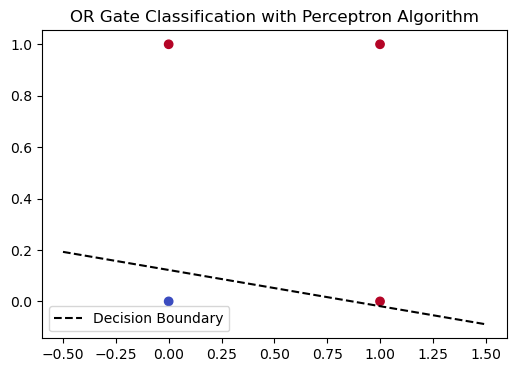

In [9]:

or_new_weight, or_new_bias = train_perceptron(or_weight_matrix, or_bias, or_feature_matrix, or_target, 0.1,100)
# usually a smaller learning rate is better for our randomly initiated paramters
print()
print(f"Weights before Training are w1:{or_weight_matrix[0].item():.2f}, w2:{or_weight_matrix[1].item():.2f} and the bias is {or_bias:.2f}")
print(f"Weights after Training are w1:{or_new_weight[0].item():.2f}, w2:{or_new_weight[1].item():.2f} and the bias is {or_new_bias:.2f}")

plot_perceptron(feature_matrix = or_feature_matrix, target = or_target, new_weight = or_new_weight, 
                    new_bias = or_new_bias, title = 'OR Gate Classification with Perceptron Algorithm')

### 3.2 And Gate Classification

In [10]:
x1 = np.array([0, 0, 1, 1]).reshape(-1, 1)
x2 = np.array([0, 1, 0, 1]).reshape(-1, 1)
y = np.array([0, 0, 0, 1]).reshape(-1, 1)  # AND output

# define feature_matrix and target
and_feature_matrix = np.hstack((x1, x2))
and_target = y
print(np.hstack((and_feature_matrix,and_target)))

[[0 0 0]
 [0 1 0]
 [1 0 0]
 [1 1 1]]


In [11]:
and_weight_matrix, and_bias = init_params(and_feature_matrix.shape[-1])
and_new_weight, and_new_bias = train_perceptron(and_weight_matrix, and_bias, and_feature_matrix, and_target, 0.1,100)
print()
print(f"Weights before Training are w1:{and_weight_matrix[0].item():.2f}, w2:{and_weight_matrix[1].item():.2f} and the bias is {and_bias:.2f}")
print(f"Weights after Training are w1:{and_new_weight[0].item():.2f}, w2:{and_new_weight[1].item():.2f} and the bias is {and_new_bias:.2f}")


Epoch 1/100: w1:0.252, w2:-0.212,b:0.177
Epoch 2/100: w1:0.152, w2:-0.212,b:-0.023
Epoch 3/100: w1:0.152, w2:-0.112,b:-0.023
Epoch 4/100: w1:0.052, w2:-0.112,b:-0.123
Epoch 5/100: w1:0.152, w2:-0.012,b:-0.023
Epoch 6/100: w1:0.052, w2:-0.012,b:-0.123
Epoch 7/100: w1:0.152, w2:0.088,b:-0.023
Epoch 8/100: w1:0.052, w2:-0.012,b:-0.223
Epoch 9/100: w1:0.152, w2:0.088,b:-0.123
Epoch 10/100: w1:0.052, w2:0.088,b:-0.223
Epoch 11/100: w1:0.152, w2:0.188,b:-0.123
Epoch 12/100: w1:0.052, w2:0.088,b:-0.323
Epoch 13/100: w1:0.152, w2:0.188,b:-0.223
Training Complete

Weights before Training are w1:0.25, w2:-0.21 and the bias is 0.18
Weights after Training are w1:0.15, w2:0.19 and the bias is -0.22


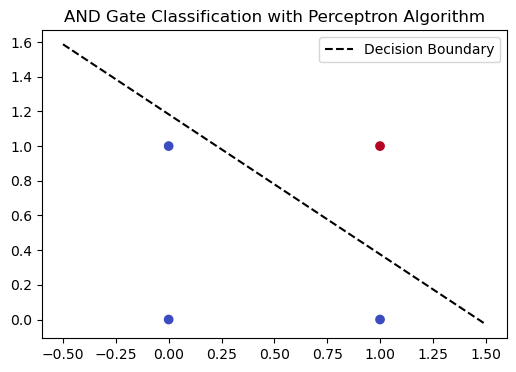

In [12]:
# plot visuals
plot_perceptron(feature_matrix = and_feature_matrix, target= and_target, new_weight = and_new_weight, 
                    new_bias = and_new_bias, title = 'AND Gate Classification with Perceptron Algorithm')

### 3.3 IRIS dataset Classification

In [13]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, :2]  # Use first two features: sepal length and width
y = iris.target

# Use only classes 0 (Setosa) and 1 (Versicolor)
binary_filter = y < 2 
# this creates a boolean mask that allows for the filter of the X values of the target classes 0 and 1
# just remember the boolean mask will 
iris_feature_matrix = X[binary_filter]
iris_target = y[binary_filter].reshape(-1, 1)
iris_weight_matrix, iris_bias = init_params(iris_feature_matrix.shape[-1])


In [19]:

iris_new_weight, iris_new_bias = train_perceptron(iris_weight_matrix, iris_bias,
                                                   iris_feature_matrix, iris_target, 0.1,100)
print()
print(f"Weights before Training are w1:{iris_weight_matrix[0].item():.2f}, w2:{iris_weight_matrix[1].item():.2f} and the bias is {iris_bias:.2f}")

print(f"Weights after Training are w1:{iris_new_weight[0].item():.2f}, w2:{iris_new_weight[1].item():.2f} and the bias is {iris_new_bias:.2f}")

Epoch 1/100: w1:-1.907, w2:-0.433,b:1.613
Epoch 2/100: w1:27.773, w2:13.417,b:6.613
Epoch 3/100: w1:2.743, w2:-3.723,b:1.613
Epoch 4/100: w1:-22.287, w2:-20.863,b:-3.387
Epoch 5/100: w1:7.393, w2:-7.013,b:1.613
Epoch 6/100: w1:-17.637, w2:-24.153,b:-3.387
Epoch 7/100: w1:12.043, w2:-10.303,b:1.613
Epoch 8/100: w1:-12.987, w2:-27.443,b:-3.387
Epoch 9/100: w1:16.693, w2:-13.593,b:1.613
Epoch 10/100: w1:-8.337, w2:-30.733,b:-3.387
Epoch 11/100: w1:21.343, w2:-16.883,b:1.613
Epoch 12/100: w1:-3.687, w2:-34.023,b:-3.387
Epoch 13/100: w1:25.993, w2:-20.173,b:1.613
Epoch 14/100: w1:0.963, w2:-37.313,b:-3.387
Epoch 15/100: w1:30.643, w2:-23.463,b:1.613
Epoch 16/100: w1:5.613, w2:-40.603,b:-3.387
Epoch 17/100: w1:35.293, w2:-26.753,b:1.613
Epoch 18/100: w1:10.263, w2:-43.893,b:-3.387
Epoch 19/100: w1:39.943, w2:-30.043,b:1.613
Epoch 20/100: w1:14.913, w2:-47.183,b:-3.387
Epoch 21/100: w1:44.593, w2:-33.333,b:1.613
Epoch 22/100: w1:19.563, w2:-50.473,b:-3.387
Epoch 23/100: w1:47.393, w2:-37.293,

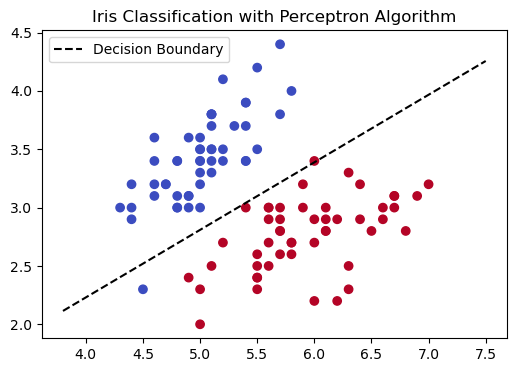

In [15]:
# plot visuals
plot_perceptron(feature_matrix = iris_feature_matrix, target= iris_target, new_weight = iris_new_weight, 
                    new_bias = iris_new_bias, title = 'Iris Classification with Perceptron Algorithm')